In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize 
def get_sentences(article):
  extracts=sent_tokenize(article)
  sentences=[]
  for extract in extracts:
    #print(extract)
    clean_sentence=extract.replace("[^a-zA-Z0-9]"," ")   ## Removing special characters
    #print(clean_sentence)
    obtained=word_tokenize(clean_sentence) 
    #print(obtained)
    sentences.append(obtained)

  return sentences

In [10]:
from nltk.cluster.util import cosine_distance
def get_similarity(sent_1,sent_2,stop_words):
  
  sent_1=[w.lower() for w in sent_1]
  sent_2=[w.lower() for w in sent_2]

  total=list(set(sent_1+sent_2)) ## Removing duplicate words in total set

  vec_1= [0] * len(total)
  vec_2= [0] * len(total)


  ## Count Vectorization of two sentences
  for w in sent_1:
    if w not in stop_words:
      vec_1[total.index(w)]+=1

  for w in sent_2:
    if w not in stop_words:
      vec_2[total.index(w)]+=1


  return 1-cosine_distance(vec_1,vec_2)

In [11]:
from nltk.corpus import stopwords
import numpy as np
def build_matrix(sentences):
  stop_words = stopwords.words('english')

  sim_matrix=np.zeros((len(sentences),len(sentences)))
  ## Adjacency matrix

  for id1 in range(len(sentences)):
    for id2 in range(len(sentences)):
      if id1==id2:  #escaping diagonal elements
        continue
      else:
        sim_matrix[id1][id2]=get_similarity(sentences[id1],sentences[id2],stop_words)

  return sim_matrix

In [12]:
def pagerank(text, eps=0.000001, d=0.85):
    score_mat = np.ones(len(text)) / len(text)
    delta=1
    ### iterative approach
    while delta>eps:
        score_mat_new = np.ones(len(text)) * (1 - d) / len(text) + d * text.T.dot(score_mat)
        delta = abs(score_mat_new - score_mat).sum()
        score_mat = score_mat_new

    return score_mat_new

In [13]:
def summarizer(article,req=3):
  summarized=[]

  sentence=get_sentences(article)

  sim_matrix=build_matrix(sentence)

  score=pagerank(sim_matrix)

  ranked_sentence = sorted(((score[i],s) for i,s in enumerate(sentence)), reverse=True)
  #print(ranked_sentence[2])
  
  for i in range(req):
      #print(ranked_sentence[i][1])
      summarized.append(" ".join(ranked_sentence[i][1]))

  return summarized

In [14]:
Article='''(CNN) -- Loud music pumps through huge speakers, front row guests cheer and a parade of stunning models electrifies the gleaming catwalk -- welcome to Africa Fashion Week London.

Currently in its third year, the glamorous event saw dozens of big names and up-and-coming designers from across the continent descending on the UK capital's hip district of Shoreditch to unveil their latest stylish creations.

"Our platform is about promoting emerging and established Africa-inspired designers," said Ronke Ademiluyi, founder of the event, held from August 1 to 3.

"The main thing is to bring attention to them, to showcase their creativity to the world so they get more global recognition for what they do and more appreciations for their brands as well."

Vibrant colors

The runways featured designs from countries such as Nigeria, Ghana, South Africa, Congo, Zambia, Zimbabwe, Botswana, Kenya and Morocco -- but also from the diaspora, including Britain and the Caribbean.

In many ways, the event reaffirmed why Africa-inspired designs are fast catching the eye of the fashion world.

Mixing current trends with traditional patterns, more than 60 designers graced the catwalk with a wide array of colorful creations -- everything from show-stopping evening gowns and modern urban casualwear to bold textured prints and chic accessory lines.

Glorious colors in the desert: Darfur's fashionable women

Ademiluyi says the continent's fashion today "represents a fusion of contemporary and African designs" awash with "a lot of vibrant colors and tribal trends."

Amongst those giving a modern twist to traditional styles is Nigerian designer Fashola Olayinka with her Lagos-based label "MOOFA Designs." Her latest collection, "Ashake" is celebrating the "very powerful and strong women" who "turn heads wherever they go to."

"That's basically what's the collection is about," says Olayinka, who started the label about four years ago. "Women who are very feminine and sexy."

Read this: Congo's designer dandies

The young designer says that despite the existing challenges, such as frequent power cuts, it's very exciting being part of Nigeria's fashion scene right now.

"We work hard and we party hard, so it's been really fun and it's a growing process in Nigeria," she says. "Nigerians like to dress up and a lot of people in Nigeria are now wearing their own fabrics."

Profile boost

But despite the growing interest in African designs, Ademiluyi says that many of the continent's promising talents still find it difficult to break into the mainstream international shows.

She says that for many of them, the week is a chance to shine on the international stage.

"A lot of them are talented but they're struggling," she says. "They don't have support from anywhere, so what we do is we support them -- it's an affordable platform for the designers to showcase their talents to the world."

Read this: Taking African colors to America's Deep South

South African fashion artist Steve Mandy agrees. He says that events like this help participants boost their profile both internationally and at home.

"You can meet some really important people here and I have already met some great people here that I think I'll do business with," says Durban-based Mandy, known for hand-painting on dresses and t-shirts.

"The other thing is the spin-off in terms of your own image, in terms of our audience back in South Africa -- the fact that you can say that you did African Fashion Week it promotes you and helps your product to gain integrity."

Looking ahead, Ademiluyi says the goal is to hold the event twice a year and also establish a supply platform that would make the designers' creations more accessible to the world.

"For a lot of them, after Africa Fashion Week, that's it," she says. "The clients don't know where to get their brand, so we hope to support the designers a lot more by opening up a distribution outlet."

'''
len(Article)

3935

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
Summary=summarizer(Article)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(Summary)

["`` Our platform is about promoting emerging and established Africa-inspired designers , '' said Ronke Ademiluyi , founder of the event , held from August 1 to 3 .", 'Vibrant colors The runways featured designs from countries such as Nigeria , Ghana , South Africa , Congo , Zambia , Zimbabwe , Botswana , Kenya and Morocco -- but also from the diaspora , including Britain and the Caribbean .', "Her latest collection , `` Ashake '' is celebrating the `` very powerful and strong women '' who `` turn heads wherever they go to . ''"]


In [17]:
!pip3 install pytextrank -q
!python -m spacy download en_core_web_sm -q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-11-30 14:24:36.587024: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll


In [18]:
import re

import numpy as np
from nltk import sent_tokenize, word_tokenize

from nltk.cluster.util import cosine_distance

MULTIPLE_WHITESPACE_PATTERN = re.compile(r"\s+", re.UNICODE)


def normalize_whitespace(text):
    """
    Translates multiple whitespace into single space character.
    If there is at least one new line character chunk is replaced
    by single LF (Unix new line) character.
    """
    return MULTIPLE_WHITESPACE_PATTERN.sub(_replace_whitespace, text)


def _replace_whitespace(match):
    text = match.group()

    if "\n" in text or "\r" in text:
        return "\n"
    else:
        return " "


def is_blank(string):
    """
    Returns `True` if string contains only white-space characters
    or is empty. Otherwise `False` is returned.
    """
    return not string or string.isspace()


def get_symmetric_matrix(matrix):
    """
    Get Symmetric matrix
    :param matrix:
    :return: matrix
    """
    return matrix + matrix.T - np.diag(matrix.diagonal())


def core_cosine_similarity(vector1, vector2):
    """
    measure cosine similarity between two vectors
    :param vector1:
    :param vector2:
    :return: 0 < cosine similarity value < 1
    """
    return 1 - cosine_distance(vector1, vector2)


'''
Note: This is not a summarization algorithm. This Algorithm pics top sentences irrespective of the order they appeared.
'''


class TextRank4Sentences():
    def __init__(self):
        self.damping = 0.85  # damping coefficient, usually is .85
        self.min_diff = 1e-5  # convergence threshold
        self.steps = 100  # iteration steps
        self.text_str = None
        self.sentences = None
        self.pr_vector = None

    def _sentence_similarity(self, sent1, sent2, stopwords=None):
        if stopwords is None:
            stopwords = []

        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return core_cosine_similarity(vector1, vector2)

    def _build_similarity_matrix(self, sentences, stopwords=None):
        # create an empty similarity matrix
        sm = np.zeros([len(sentences), len(sentences)])

        for idx1 in range(len(sentences)):
            for idx2 in range(len(sentences)):
                if idx1 == idx2:
                    continue

                sm[idx1][idx2] = self._sentence_similarity(sentences[idx1], sentences[idx2], stopwords=stopwords)

        # Get Symmeric matrix
        sm = get_symmetric_matrix(sm)

        # Normalize matrix by column
        norm = np.sum(sm, axis=0)
        sm_norm = np.divide(sm, norm, where=norm != 0)  # this is ignore the 0 element in norm

        return sm_norm

    def _run_page_rank(self, similarity_matrix):

        pr_vector = np.array([1] * len(similarity_matrix))

        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr_vector = (1 - self.damping) + self.damping * np.matmul(similarity_matrix, pr_vector)
            if abs(previous_pr - sum(pr_vector)) < self.min_diff:
                break
            else:
                previous_pr = sum(pr_vector)

        return pr_vector

    def _get_sentence(self, index):

        try:
            return self.sentences[index]
        except IndexError:
            return ""

    def get_top_sentences(self, number=5):

        top_sentences = []

        if self.pr_vector is not None:

            sorted_pr = np.argsort(self.pr_vector)
            sorted_pr = list(sorted_pr)
            sorted_pr.reverse()

            index = 0
            for epoch in range(number):
                sent = self.sentences[sorted_pr[index]]
                sent = normalize_whitespace(sent)
                top_sentences.append(sent)
                index += 1

        return top_sentences

    def analyze(self, text, stop_words=None):
        self.text_str = text
        self.sentences = sent_tokenize(self.text_str)

        tokenized_sentences = [word_tokenize(sent) for sent in self.sentences]

        similarity_matrix = self._build_similarity_matrix(tokenized_sentences, stop_words)

        self.pr_vector = self._run_page_rank(similarity_matrix)

In [19]:
text_str = '''(CNN) -- Loud music pumps through huge speakers, front row guests cheer and a parade of stunning models electrifies the gleaming catwalk -- welcome to Africa Fashion Week London.

Currently in its third year, the glamorous event saw dozens of big names and up-and-coming designers from across the continent descending on the UK capital's hip district of Shoreditch to unveil their latest stylish creations.

"Our platform is about promoting emerging and established Africa-inspired designers," said Ronke Ademiluyi, founder of the event, held from August 1 to 3.

"The main thing is to bring attention to them, to showcase their creativity to the world so they get more global recognition for what they do and more appreciations for their brands as well."

Vibrant colors

The runways featured designs from countries such as Nigeria, Ghana, South Africa, Congo, Zambia, Zimbabwe, Botswana, Kenya and Morocco -- but also from the diaspora, including Britain and the Caribbean.

In many ways, the event reaffirmed why Africa-inspired designs are fast catching the eye of the fashion world.

Mixing current trends with traditional patterns, more than 60 designers graced the catwalk with a wide array of colorful creations -- everything from show-stopping evening gowns and modern urban casualwear to bold textured prints and chic accessory lines.

Glorious colors in the desert: Darfur's fashionable women

Ademiluyi says the continent's fashion today "represents a fusion of contemporary and African designs" awash with "a lot of vibrant colors and tribal trends."

Amongst those giving a modern twist to traditional styles is Nigerian designer Fashola Olayinka with her Lagos-based label "MOOFA Designs." Her latest collection, "Ashake" is celebrating the "very powerful and strong women" who "turn heads wherever they go to."

"That's basically what's the collection is about," says Olayinka, who started the label about four years ago. "Women who are very feminine and sexy."

Read this: Congo's designer dandies

The young designer says that despite the existing challenges, such as frequent power cuts, it's very exciting being part of Nigeria's fashion scene right now.

"We work hard and we party hard, so it's been really fun and it's a growing process in Nigeria," she says. "Nigerians like to dress up and a lot of people in Nigeria are now wearing their own fabrics."

Profile boost

But despite the growing interest in African designs, Ademiluyi says that many of the continent's promising talents still find it difficult to break into the mainstream international shows.

She says that for many of them, the week is a chance to shine on the international stage.

"A lot of them are talented but they're struggling," she says. "They don't have support from anywhere, so what we do is we support them -- it's an affordable platform for the designers to showcase their talents to the world."

Read this: Taking African colors to America's Deep South

South African fashion artist Steve Mandy agrees. He says that events like this help participants boost their profile both internationally and at home.

"You can meet some really important people here and I have already met some great people here that I think I'll do business with," says Durban-based Mandy, known for hand-painting on dresses and t-shirts.

"The other thing is the spin-off in terms of your own image, in terms of our audience back in South Africa -- the fact that you can say that you did African Fashion Week it promotes you and helps your product to gain integrity."

Looking ahead, Ademiluyi says the goal is to hold the event twice a year and also establish a supply platform that would make the designers' creations more accessible to the world.

"For a lot of them, after Africa Fashion Week, that's it," she says. "The clients don't know where to get their brand, so we hope to support the designers a lot more by opening up a distribution outlet."

'''

tr4sh = TextRank4Sentences()
tr4sh.analyze(text_str)
print(tr4sh.get_top_sentences(5))

['"For a lot of them, after Africa Fashion Week, that\'s it," she says.', 'She says that for many of them, the week is a chance to shine on the international stage.', 'Glorious colors in the desert: Darfur\'s fashionable women\nAdemiluyi says the continent\'s fashion today "represents a fusion of contemporary and African designs" awash with "a lot of vibrant colors and tribal trends."', '"Our platform is about promoting emerging and established Africa-inspired designers," said Ronke Ademiluyi, founder of the event, held from August 1 to 3.', "Looking ahead, Ademiluyi says the goal is to hold the event twice a year and also establish a supply platform that would make the designers' creations more accessible to the world."]


In [20]:
import pandas as pd

df = pd.read_csv('data.csv')
df = df[['text','ctext']]
df.columns = ['article','highlights']
df.head()

,article,highlights
0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [21]:
sent_length = pd.DataFrame(df.article.apply(len).values, columns=['Article'])
sent_length['Summary'] = df.highlights.apply(len) 
pd.DataFrame(sent_length.mean().apply(lambda x: round(x,3)), columns = ['mean'])

,mean
Article,3914.041
Summary,260.989


In [22]:
sent_length_quant = sent_length.quantile([0,0.25,0.5,0.75,0.95,0.99, 1])
sent_length_quant.index.name = 'Percentile'
sent_length_quant.columns.name = 'Number of Sentences'
sent_length_quant

Number of Sentences,Article,Summary
Percentile,,
0.00,1.0,51.0
0.25,2300.0,220.0
0.50,3612.0,264.0
0.75,5195.0,306.0
0.95,7762.0,346.0
0.99,9561.0,368.0
1.00,11697.0,606.0


In [23]:
# !pip install seaborn -q

r_squared =  0.089


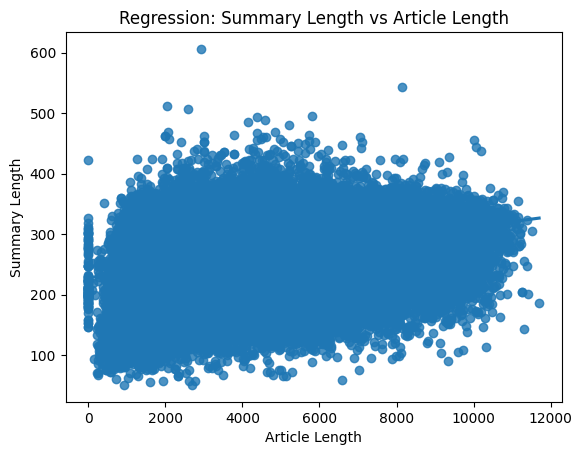

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.regplot(x='Article', y='Summary', data=sent_length);
plt.title('Regression: Summary Length vs Article Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
r_squared_matrix = np.corrcoef(sent_length.Article, sent_length.Summary)**2

print('r_squared = ', round(r_squared_matrix[0][1],3))
plt.show()

In [25]:
# !pip install sentence_transformers -q
# !python -m spacy download en_core_web_sm -q
# !python -m spacy download en_core_web_md -q
# !python -m spacy download en_core_web_lg -q

In [26]:
"""
preprocessing_embed.py
"""
import pickle
import pandas as pd
import numpy as np
import spacy
from sentence_transformers import SentenceTransformer
from datetime import datetime as dt


### Helper function

def text_to_sent_list(text, 
                      nlp = spacy.load("en_core_web_sm"), 
                      embedder = SentenceTransformer('distilbert-base-nli-mean-tokens'),
                      min_len=2):
    
    ''' Returns cleaned article sentences and BERT sentence embeddings'''
    
    #convert to list of sentences
    text = nlp(text)
    sents = list(text.sents)
    #remove short sentences by threshhold                                                                                                
    sents_clean = [sentence.text for sentence in sents if len(sentence)> min_len]
    #remove entries with empty list
    sents_clean = [sentence for sentence in sents_clean if len(sentence)!=0]
    #embed sentences (deafult uses BERT SentenceTransformer)
    sents_embedding= embedder.encode(sents_clean, convert_to_tensor=True)
    sents_embedding = sents_embedding.cpu().detach().numpy()
    
    return sents_clean, sents_embedding



### Script

output_file = 'train_stats_df_processed_extr_5000.pickle'  
# #load full extractive df
# df = pd.read_pickle('train_stats_df_extractive_no_spacy.pickle')

#truncate for local computation
df= df.head(500).reset_index(drop=True)

#load nlp and embedder
nlp = spacy.load("en_core_web_sm")
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

t1 = dt.now()
print(t1)
print(df.columns)
#extract clean sentence list and sentence embedding for each article TEXT
f = lambda text: text_to_sent_list(text, nlp=nlp, embedder=embedder, min_len=0)
s_interim_tuple = df['article'].apply(f)

df['text_clean'] = s_interim_tuple.apply(lambda x: x[0])
df['text_embedding'] = s_interim_tuple.apply(lambda x: x[1])

#extract clean sentence list and sentence embedding for each article SUMMARY
f = lambda summ: text_to_sent_list(summ, nlp=nlp, embedder=embedder, min_len=0)
s_interim_tuple = df['highlights'].apply(f)

df['summary_clean'] = s_interim_tuple.apply(lambda x: x[0])
df['summary_embedding'] = s_interim_tuple.apply(lambda x: x[1])

with open(output_file, 'wb') as handle:                                     
    pickle.dump(df, handle)

t2=dt.now()
print(t2)
print(t2-t1)

#5000 articles took 1hr40mins

2021-11-30 14:26:19.966483
Index(['article', 'highlights'], dtype='object')
2021-11-30 14:27:50.227716
0:01:30.261233


In [27]:
"""
preprocessing label_target.py
"""
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

from datetime import datetime as dt

### Helper Functions

def find_sim_single_summary(summary_sentence_embed, doc_emedding):
    '''returns array of indices for max cosine sim per summary sentences'''
    cos_sim_mat = cosine_similarity(doc_emedding, summary_sentence_embed)
    idx_arr = np.argmax(cos_sim_mat, axis=0)
    
    return idx_arr

def label_sent_in_summary(s_text, s_summary):
    '''returns index list and binary target labels in an array'''
    doc_num = s_text.shape[0]
    
    #initialize zeros
    labels = [np.zeros(doc.shape[0]) for doc in s_text.tolist()] 
    
    #calc idx for most similar
    
    idx_list = [np.sort(find_sim_single_summary(s_summary[j], s_text[j])) for j 
                                                            in range(doc_num)]
      
    for j in range(doc_num):
        labels[j][idx_list[j]]= 1 
    
    return idx_list, labels


### Script

t1 = dt.now()
print(t1)

output_file = 'train_stats_df_processed_extr_label_5000.pickle'

df = pd.read_pickle('train_stats_df_processed_extr_5000.pickle' )
print(len(df.text_embedding))
print(len(df.summary_embedding))

#get index list and target labels
idx_list, labels = label_sent_in_summary(df.text_embedding, df.summary_embedding)

#wrap in dataframe
df['labels'] = labels
df['labels_idx_list'] = idx_list

#save to pickle
with open(output_file, 'wb') as handle:                                     
    pickle.dump(df, handle)

t2 = dt.now()

print(t2)

print(t2-t1)

2021-11-30 14:27:50.249633
500
500
2021-11-30 14:27:51.499561
0:00:01.249928


In [28]:
"""
add_additional_features.py
"""

import numpy as np
import pandas as pd
import pickle
from datetime import datetime as dt

t1 = dt.now()
print(t1)
    
output_file = 'train_stats_dict_processed_extr_final_5000_.pickle'
    
df = pd.read_pickle('train_stats_df_processed_extr_label_5000.pickle')

#define features and labels as separate series
s_embed_text = df.text_embedding
s_y_labels= df.labels

#label docs
s_doc_label = pd.Series(range(df.shape[0]), name = 'doc_label')

#calculate doc mean
s_doc_mean = s_embed_text.apply(lambda x: x.mean(axis=0).reshape(1,-1))
    
#calculate doc sent length
s_doc_length = s_embed_text.apply(lambda x: x.shape[0])


#create values for each sentence in doc 
X_doc_label_list =[]
X_doc_mean_list = []
X_doc_length_list = []
X_sent_num_list = []

for j in range(len(df)):
    X_doc_label = s_doc_label[j]
    X_doc_mean = s_doc_mean[j]
    X_doc_length = s_doc_length[j]
    X_text = s_embed_text [j]
    n = X_text.shape[0]
    
    X_doc_label_fixed = X_doc_label
    X_doc_mean_fixed = X_doc_mean
    X_doc_length_fixed = X_doc_length 
    sent_num = []
    for i in range(n-1): 
        X_doc_label = np.vstack((X_doc_label, X_doc_label_fixed )) 
        X_doc_mean = np.vstack((X_doc_mean, X_doc_mean_fixed )) 
        X_doc_length = np.vstack((X_doc_length, X_doc_length_fixed )) 
        sent_num.append(i)
    sent_num.append(n-1)
    
    X_doc_label_list.append(X_doc_label)
    X_doc_mean_list.append(X_doc_mean)
    X_doc_length_list.append(X_doc_length)
    X_sent_num_list.append(np.array(sent_num).reshape(-1,1))
    
#from list to pandas series
s_doc_label = pd.Series(X_doc_label_list)
s_doc_mean = pd.Series(X_doc_mean_list)
s_doc_length = pd.Series(X_doc_length_list)
s_sent_num = pd.Series(X_sent_num_list)

#concatenate documents with rows = sentences
  #intialize
Xy_doc_label = s_doc_label.values[0]
X = np.hstack((s_embed_text[0], s_doc_mean[0], s_sent_num[0], s_doc_length[0]))
y= s_y_labels[0].reshape(-1,1)
  #recursive population
f = np.vectorize(lambda x: x if type(x) == np.ndarray else np.array([[x]]))  
for j in range(1, len(df)):
    Xy_doc_label_new = s_doc_label.values[j]
    
    X_text_new = s_embed_text [j]
    X_sent_num_new = s_sent_num[j]
    X_doc_mean_new = s_doc_mean[j]
    X_doc_length_new = f(s_doc_length[j])
    y_new = s_y_labels[j].reshape(-1,1)
    
    X_new = np.hstack((X_text_new, X_doc_mean_new, X_sent_num_new, X_doc_length_new))
    
    X = np.vstack((X, X_new))
    y = np.vstack((y, y_new))           
    
    Xy_doc_label = np.vstack((Xy_doc_label, Xy_doc_label_new))
        
#wrap X in dataframe with lables
labels_text_embedding = ['Sent_BERT_D_' + str(j) for j in range(768)]
labels_doc_mean = ['Doc_BERT_D_' + str(j) for j in range(768)]
other_labels = ['Sent_Number', 'Doc_Length']
col_names = labels_text_embedding + labels_doc_mean + other_labels

df_X = pd.DataFrame(X, columns = col_names)
    
data_dict = {'df_original': df, 'Xy_doc_label_array': Xy_doc_label, 
              'df_X': df_X, 'y_array': y}
    
with open(output_file, 'wb') as handle:                                     
    pickle.dump(data_dict, handle)
    
t2 = dt.now()

print(t2)
print(t2-t1)

#5000 articles took 48 mins

2021-11-30 14:28:11.411952
2021-11-30 14:28:30.527016
0:00:19.115064


In [29]:
### Helper Function

'''functions.py'''

def gen_train_test_split_doc_level(Xy_doc_label, X, y, 
                                         test_ratio, folds=1, rand_seed=42):
    '''returns train doc labels, test doc labels, and train and test sets
    for features X and target Y'''
    
    
    random.seed(rand_seed)
    
    #index is doc label 
    total_docs = Xy_doc_label.max()
    train_docs_num = int(total_docs*(1-test_ratio))
    
    #for k >1, want to ensure different seeds
    rand_state_list = random.sample(range(2*folds), folds)
    
    #look through k folds
    train_test_set = []
    for state in rand_state_list:
    
        random.seed(state)
        #sample random training set and mask
        train_docs = random.sample(range(1, total_docs+1), train_docs_num)
        train_mask = np.array([x in train_docs for x in list(Xy_doc_label)])
        
        #use mask to define train and test sets
        X_train = X[train_mask]
        y_train = y[train_mask]
    
        X_test = X[~train_mask]
        y_test = y[~train_mask]
    
        Xy_doc_label_train = Xy_doc_label[train_mask]
        Xy_doc_label_test = Xy_doc_label[~train_mask]
        
        #assign all data to tuple for each pass
        data_pass = (Xy_doc_label_train, Xy_doc_label_test,
                                             X_train, X_test, y_train, y_test)
        #append results for ith fold to set 
        train_test_set.append(data_pass)
    
    #set answer tuples to final tuple as container
    train_test_set = tuple(train_test_set)

    return train_test_set

In [30]:
### Helper Function

'''functions.py'''

def gen_train_test_split_doc_level(Xy_doc_label, X, y, 
                                         test_ratio, folds=1, rand_seed=42):
    '''returns train doc labels, test doc labels, and train and test sets
    for features X and target Y'''
    
    
    random.seed(rand_seed)
    
    #index is doc label 
    total_docs = Xy_doc_label.max()
    train_docs_num = int(total_docs*(1-test_ratio))
    
    #for k >1, want to ensure different seeds
    rand_state_list = random.sample(range(2*folds), folds)
    
    #look through k folds
    train_test_set = []
    for state in rand_state_list:
    
        random.seed(state)
        #sample random training set and mask
        train_docs = random.sample(range(1, total_docs+1), train_docs_num)
        train_mask = np.array([x in train_docs for x in list(Xy_doc_label)])
        
        #use mask to define train and test sets
        X_train = X[train_mask]
        y_train = y[train_mask]
    
        X_test = X[~train_mask]
        y_test = y[~train_mask]
    
        Xy_doc_label_train = Xy_doc_label[train_mask]
        Xy_doc_label_test = Xy_doc_label[~train_mask]
        
        #assign all data to tuple for each pass
        data_pass = (Xy_doc_label_train, Xy_doc_label_test,
                                             X_train, X_test, y_train, y_test)
        #append results for ith fold to set 
        train_test_set.append(data_pass)
    
    #set answer tuples to final tuple as container
    train_test_set = tuple(train_test_set)

    return train_test_set

In [31]:
"""
add_sent_num_to_train_test_split.py
"""
import pickle
import pandas as pd
import random


input_filename = 'train_stats_dict_processed_extr_final_5000_.pickle' 
folds = 1

output_file = 'train_test_set20_embeddings_sent_num.pickle'

data_dict = pd.read_pickle(input_filename)

#Specify model inputs: df, X, y, doc_labels
df = data_dict['df_original']
Xy_doc_label = data_dict['Xy_doc_label_array']
X = data_dict['df_X'].drop(['Doc_Length'], axis=1).values
y = data_dict['y_array']

        
#train test split at document level

train_test_set = gen_train_test_split_doc_level(Xy_doc_label, X, y, 
                                         test_ratio=0.2, folds=folds, rand_seed=42)

data_dict.update({'train_test_sets': train_test_set })

with open(output_file, 'wb') as handle:                                     
    pickle.dump(data_dict, handle)

In [32]:
import pandas as pd
import numpy as np
import random
from rouge_score import rouge_scorer

def gen_x_y_doc_labels_for_mean_num_sent(df):

    #convert tensors to numpy array
    to_array = lambda x: np.array(x)
    s_embed_text = df.embed_text.apply(to_array).reset_index(drop=True)
    s_y_labels= df.y_labels.apply(to_array).reset_index(drop=True)

    #label docs
    s_doc_label = pd.Series(range(df.shape[0]), name = 'doc_label')

    #calculate doc mean
    s_doc_mean = s_embed_text.apply(lambda x: x.mean(axis=0).reshape(1,-1))


    #create values for each sentence in doc 
    X_doc_label_list =[]
    X_doc_mean_list = []
    X_sent_num_list = []

    for j in range(len(df)):
        X_doc_label = s_doc_label[j]
        X_doc_mean = s_doc_mean[j]
        X_text = s_embed_text [j]
        n = X_text.shape[0]
    
        X_doc_label_fixed = X_doc_label
        X_doc_mean_fixed = X_doc_mean
        sent_num = []
        for i in range(n-1): 
            X_doc_label = np.vstack((X_doc_label, X_doc_label_fixed )) 
            X_doc_mean = np.vstack((X_doc_mean, X_doc_mean_fixed )) 
            sent_num.append(i)
        sent_num.append(n-1)
    
        X_doc_label_list.append(X_doc_label)
        X_doc_mean_list.append(X_doc_mean)
        X_sent_num_list.append(np.array(sent_num).reshape(-1,1))
    
    #from list to pandas series
    s_doc_label = pd.Series(X_doc_label_list)
    s_doc_mean = pd.Series(X_doc_mean_list)
    s_sent_num = pd.Series(X_sent_num_list)

    #concatenate documents with rows = sentences
     #intialize
    Xy_doc_label = s_doc_label.values[0]
    X = np.hstack((s_embed_text[0], s_doc_mean[0], s_sent_num[0]))
    y= s_y_labels[0].reshape(-1,1)
     #recursive population
    for j in range(1, len(df)):
        Xy_doc_label_new = s_doc_label.values[j]
    
        X_text_new = s_embed_text [j]
        X_sent_num_new =s_sent_num[j]
        X_doc_mean_new = s_doc_mean[j]
        y_new = s_y_labels[j].reshape(-1,1)
    
        X_new = np.hstack((X_text_new, X_doc_mean_new, X_sent_num_new))
    
        X = np.vstack((X, X_new))
        y = np.vstack((y, y_new))           
    
        Xy_doc_label = np.vstack((Xy_doc_label, Xy_doc_label_new))
        
    return Xy_doc_label, X, y

def gen_train_test_split_doc_level(Xy_doc_label, X, y, 
                                         test_ratio, folds=1, rand_seed=42):
    

    random.seed(rand_seed)
    total_docs = Xy_doc_label.max()
    train_docs_num = int(total_docs*(1-test_ratio))

    rand_state_list = random.sample(range(2*folds), folds)

    train_test_set = []

    for state in rand_state_list:
    
        random.seed(state)

        train_docs = random.sample(range(1, total_docs+1), train_docs_num)
        train_mask = np.array([x in train_docs for x in list(Xy_doc_label)])
    
        X_train = X[train_mask]
        y_train = y[train_mask]
    
        X_test = X[~train_mask]
        y_test = y[~train_mask]
    
        Xy_doc_label_train = Xy_doc_label[train_mask]
        Xy_doc_label_test = Xy_doc_label[~train_mask]

        data_pass = (Xy_doc_label_train, Xy_doc_label_test,
                                             X_train, X_test, y_train, y_test)
    
        train_test_set.append(data_pass)
    
    train_test_set = tuple(train_test_set)

    return train_test_set


def return_greater_than_min_num(arr, thresh=0.5, min_num=1, fix_num_flag=False, fix_num=3):
    
    if fix_num_flag == True:
        idx = np.argsort(arr)[-fix_num:]
        
    else:
        idx_prelim = np.where(arr>= thresh)
    
        if idx_prelim[0].shape[0] <= min_num:
            idx = np.argsort(arr)[-min_num:]
        else:
            idx = idx_prelim
    
    return sorted(idx)

    
def return_df_pred_summaries( Xy_doc_label, y_pred, df_text, thresh, min_num,
                             return_all=False, fix_num_flag=False, fix_num=3):
    
    df_label_pred = pd.DataFrame({'doc_label': Xy_doc_label.flatten(),
                                                 'y_pred': y_pred.flatten()}) 
    df_label_pred = df_label_pred.groupby('doc_label').agg(list) 

    df_label_pred = df_label_pred.applymap(lambda x: np.array(x))

    f = lambda arr: return_greater_than_min_num(arr, thresh=thresh, 
                                    min_num=min_num,fix_num_flag = fix_num_flag, 
                                                            fix_num=fix_num)

    df_label_pred = df_label_pred.applymap(f) 

    #Return predicted summaryy_
    df_doc = df_text[df_label_pred.index]
    
    
    pred_summaries = [np.array(df_doc.iloc[j])
                               [df_label_pred.iloc[j][0]].tolist()                      #???
                                          for j in range(len(df_label_pred))]

    pred_summaries = [summ_list if type(summ_list) == str else 
                      ' '.join(summ_list) for summ_list in pred_summaries]
    
    if return_all == True:
        answer = df_label_pred.values, df_label_pred.index, pred_summaries
    else:
        answer = pred_summaries
    
    return answer
    

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    
    n = len(pred_summaries)
    
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
    
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

In [33]:
'''logreg_embeddings_num_sent.py'''
import pickle
import pandas as pd
# from functions import return_df_pred_summaries
# from functions import calc_rouge_scores
from sklearn.linear_model import LogisticRegression

from datetime import datetime as dt

from sklearn.metrics import confusion_matrix

input_filename = 'train_test_set20_embeddings_sent_num.pickle'     

output_file = 'XXX.pickle'

t1 = dt.now()
print(t1)

data_dict = pd.read_pickle(input_filename)

#Specify model inputs: df, X, y, doc_labels
df = data_dict['df_original']
train_test_set = data_dict['train_test_sets']
#Specify train-test_data for validation        
Xy_doc_label_train = train_test_set[0][0]
Xy_doc_label_test = train_test_set[0][1]
X_train = train_test_set[0][2]
X_test = train_test_set[0][3]
y_train = train_test_set[0][4]
y_test = train_test_set[0][5]

#Define Model
model = LogisticRegression(random_state=42)
        # LogisticRegression(class_weight='balanced', random_state=42)
#Fit model
model.fit(X_train,y_train)
#Predict Model
y_pred = model.predict_proba(X_test)
    
#Convert to binary predictions
y_pred_bin = (y_pred >=0.5)*1

cm = confusion_matrix(y_test, y_pred_bin[:,1], labels=[0,1])

   
#Return predicted summaries
idx, doc_index, pred_summaries = return_df_pred_summaries(Xy_doc_label_test, 
                                y_pred[:,1], df.text_clean, thresh=0.5, min_num=1, 
                                return_all = True, fix_num_flag=True, fix_num=3)


#Match with gold summaries
df_gold = df.summary_clean[doc_index]
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp = tuple(zip(pred_summaries, gold_summaries))

scores = calc_rouge_scores(pred_summaries, gold_summaries, 
                                  keys=['rouge1', 'rougeL'], use_stemmer=True)


results_dict ={'conf_matrix': cm, 'summaries_comp': summaries_comp,
               'sent_index_number': idx, 'Rouge': scores}

with open(output_file, 'wb') as handle:                                     
    pickle.dump(results_dict, handle)

print(scores)

t2 = dt.now()
print(t2)
print(t2-t1)

2021-11-30 14:29:15.746729


C:\Users\user\Anaconda3\envs\hugging_face\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\Anaconda3\envs\hugging_face\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'rouge1': {'recall': 0.2339273720610054, 'precision': 0.43749140986630536, 'f1': 0.29824425715838115}, 'rougeL': {'recall': 0.15284542883206093, 'precision': 0.28532683105625467, 'f1': 0.19480309370913187}}
2021-11-30 14:29:19.986211
0:00:04.239482


In [41]:
'''lstm1.py'''
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from sklearn.metrics import classification_report, confusion_matrix

# from functions import calc_rouge_scores
from keras.layers import Bidirectional


input_filename = 'train_test_set20_embeddings_sent_num.pickle'
output_file = 'XXX.pickle'

data_dict = pd.read_pickle(input_filename)

df = data_dict['df_original']

#step 1: process data for ltsm input

#convert to numpy array
to_array = lambda x: np.array(x)
df.text_embedding = df.text_embedding.apply(to_array)
df.labels= df.labels.apply(to_array)
df.text_embedding = df.text_embedding.apply(lambda x: x.reshape(1, x.shape[0],x.shape[1]))
df.labels = df.labels.apply(lambda x: x.reshape(1, len(x),1))

#train_test split
train_doc_labels = set(data_dict['train_test_sets'][0][0].flatten())
mask_train = np.array([x in train_doc_labels for x in df.index]) 

X_train = df.text_embedding[mask_train].tolist()
y_train = df.labels[mask_train].tolist()

X_test = df.text_embedding[~mask_train].tolist()
y_test = df.labels[~mask_train].tolist()


# define LSTM
model = Sequential()

model.add(LSTM(25, input_shape=(None, 768), return_sequences=True, dropout=0))
# model.add(LSTM(25, input_shape=(None, 768), return_sequences=True, dropout=0))

# model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0), input_shape=(None, 768)))
# model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0), input_shape=(None, 768)))

model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[tf.keras.metrics.SensitivityAtSpecificity(0.5, num_thresholds=1)])


# train LSTM
training_loss =[]
training_metric = []
for j in range(len(X_train)):   
    X, y = X_train[j], y_train[j]
    history = model.fit(X, y, epochs=1, batch_size=1)
    training_loss.append(history.history['loss'])
    
# evaluate LSTM
y_pred_list =[]
idx_list=[]
for j in range(len(X_test)):
    X= X_test[j]
    y_pred = model.predict(X, verbose=0)
    idx = np.argsort(y_pred[0].flatten())[-3:]
    idx = sorted(idx)
    y_pred_list.append(y_pred)
    idx_list.append(idx)

    
#retrieve summary pairs
doc_index = df.index[~mask_train]
pred_summaries = [' '.join(np.array(df.text_clean[doc_index].iloc[j])[np.array(idx_list[j])].tolist()) 
                  for j in range(len(idx_list))]
df_gold = df.summary_clean[doc_index]
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp = tuple(zip(pred_summaries, gold_summaries))


#calculate rouge score
scores = calc_rouge_scores(pred_summaries, gold_summaries, 
                                  keys=['rouge1', 'rougeL'], use_stemmer=True)

results_dict ={'summaries_comp': summaries_comp,
               'sent_index_number': idx, 'Rouge': scores, 'mod_summary': model.summary()}

with open(output_file, 'wb') as handle:                                     
    pickle.dump(results_dict, handle)

CancelledError:  [_Derived_]RecvAsync is cancelled.
	 [[{{node assert_less_equal/Assert/AssertGuard/else/_11/assert_less_equal/Assert/AssertGuard/Assert/data_4/_42}}]]
	 [[ConstantFolding/assert_less_equal/Assert/AssertGuard/switch_pred/_12_const_false/_29]] [Op:__inference_train_function_28934]

Function call stack:
train_function


In [ ]:
X[0]